# NYCC Data Scientist Exercise
## Author: Dr. Rachael Alexandroff
###  Purpose: data analysis examining trends in arrest rates in NYC from 2015-2018

In [75]:
#some packages needed for initial analysis
import pandas as pd
import numpy as np
from sodapy import Socrata

In [76]:
#setting up plotting environment
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
#use Socrata to download data from the New York City OpenData website
#this allows me to filter for the years I want to use for the analysis
#and means I don't have to download the data to my hard drive which saves me space (it's a big dataset!)
client = Socrata("data.cityofnewyork.us", 
                 "NgWfz44PFFEnBW0Eo1TxYTieH", 
                username='rachael.m.a@gmail.com',
                password='vf5mtZqmxNVz')
#results = client.get("8h9b-rp9u", limit=2000)
results = client.get("8h9b-rp9u", 
                     where="arrest_date between '2015-01-01' and '2018-12-31'",limit=2000000)
results_df = pd.DataFrame.from_records(results)

In [78]:
#just taking a look at the table structure to make sure I understand it and that it matches the description online
results_df.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude
0,140394498,2015-01-01T00:00:00.000,748.0,"CONTEMPT,CRIMINAL",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 2155003,M,S,123,0.0,45-64,M,WHITE,927599.0,138176.0,40.545764040000044,-74.20383919899997
1,140389312,2015-01-01T00:00:00.000,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1600500,F,K,75,0.0,25-44,M,BLACK,1015965.0,181781.0,40.66557499100002,-73.88568179399994
2,140392539,2015-01-01T00:00:00.000,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,B,48,0.0,<18,M,BLACK HISPANIC,1011811.0,246833.0,40.844139945000045,-73.90038861799998
3,140392584,2015-01-01T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,28,0.0,18-24,F,BLACK,997098.0,230560.0,40.799508822000064,-73.95359648099996
4,140392631,2015-01-01T00:00:00.000,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601504,F,Q,109,0.0,18-24,M,WHITE,1032084.0,216954.0,40.762043893000055,-73.82732958099997


In [84]:
#checking the data type of every object I notice that they are classified as "objects"
#this means I can't use certain methods to examine the data meant for specific (numeric, date time) data types
results_df.dtypes

arrest_key           object
arrest_date          object
pd_cd                object
pd_desc              object
ky_cd                object
ofns_desc            object
law_code             object
law_cat_cd           object
arrest_boro          object
arrest_precinct      object
jurisdiction_code    object
age_group            object
perp_sex             object
perp_race            object
x_coord_cd           object
y_coord_cd           object
latitude             object
longitude            object
dtype: object

In [86]:
#thus here I 'cast' or convert some of the columns to data types that are more useful for calculations
#here I'm only doing it for the few columns I use
results_df.arrest_key=results_df.arrest_key.apply(pd.to_numeric)

In [88]:
results_df.arrest_date=results_df.arrest_date.apply(pd.to_datetime)

In [439]:
results_df.arrest_precinct=results_df.arrest_precinct.apply(pd.to_numeric)

In [440]:
#yay it works!
results_df.dtypes

arrest_key                    int64
arrest_date          datetime64[ns]
pd_cd                        object
pd_desc                      object
ky_cd                        object
ofns_desc                    object
law_code                     object
law_cat_cd                   object
arrest_boro                  object
arrest_precinct               int64
jurisdiction_code            object
age_group                    object
perp_sex                     object
perp_race                    object
x_coord_cd                   object
y_coord_cd                   object
latitude                     object
longitude                    object
year                          int64
month                         int64
dtype: object

In [210]:
#I add a year and month column seperated out from the 'arrest_date' column as this will make grouping the data
#by year or month easier
results_df['year'] = results_df.arrest_date.dt.year
results_df['month'] = results_df.arrest_date.dt.month

In [211]:
results_df.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,year,month
0,140394498,2015-01-01,748.0,"CONTEMPT,CRIMINAL",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 2155003,M,S,123,0.0,45-64,M,WHITE,927599.0,138176.0,40.545764040000044,-74.20383919899997,2015,1
1,140389312,2015-01-01,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1600500,F,K,75,0.0,25-44,M,BLACK,1015965.0,181781.0,40.66557499100002,-73.88568179399994,2015,1
2,140392539,2015-01-01,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,B,48,0.0,<18,M,BLACK HISPANIC,1011811.0,246833.0,40.844139945000045,-73.90038861799998,2015,1
3,140392584,2015-01-01,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,28,0.0,18-24,F,BLACK,997098.0,230560.0,40.799508822000064,-73.95359648099996,2015,1
4,140392631,2015-01-01,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601504,F,Q,109,0.0,18-24,M,WHITE,1032084.0,216954.0,40.762043893000055,-73.82732958099997,2015,1


In [223]:
#importing a calendar package to help deal with dates (specifically to calculate the number of days in a month)
import calendar

'Jan'

In [245]:
#here I'm grouping the arrests by month and year and counting up the number of arrests in each group
#this will give me the number of arrests per month
results_month=results_df.groupby(['year','month']).arrest_key.count()
results_month_keys = list(results_month.keys())

results_month_keys

#results_month_keys_month = [calendar.month_abbr[n] for n in list(map(itemgetter(1), results_month_keys))]
#results_month_keys_month

#to make the x-axis for this graph I convert the month to a string of the abbreviation (aka 1--> Jan. etc.)
#and combine it with the year
res_xaxis = [calendar.month_abbr[m]+" "+str(n) for m,n in zip(list(map(itemgetter(1), results_month_keys)), list(map(itemgetter(0), results_month_keys)))]
res_xaxis

#calculating the number of days in each month
date = [calendar.monthrange(n,m)[1] for m,n in zip(list(map(itemgetter(1), results_month_keys)), list(map(itemgetter(0), results_month_keys)))]
#dividing the total number of arrests each month by the number of days gives me the average number of arrests each month
results_month=results_month/date

In [246]:
results_month

year  month
2015  1         817.354839
      2         967.000000
      3         967.967742
      4         998.600000
      5         923.967742
      6         956.066667
      7         973.838710
      8        1010.903226
      9         957.500000
      10        934.774194
      11        868.766667
      12        789.451613
2016  1         882.032258
      2         932.275862
      3         922.032258
      4         896.900000
      5         908.903226
      6         882.333333
      7         792.354839
      8         870.419355
      9         834.033333
      10        868.258065
      11        781.400000
      12        755.612903
2017  1         831.290323
      2         827.321429
      3         827.677419
      4         834.200000
      5         808.000000
      6         781.033333
      7         755.903226
      8         777.354839
      9         752.833333
      10        798.225806
      11        766.366667
      12        654.032258
2018  1         

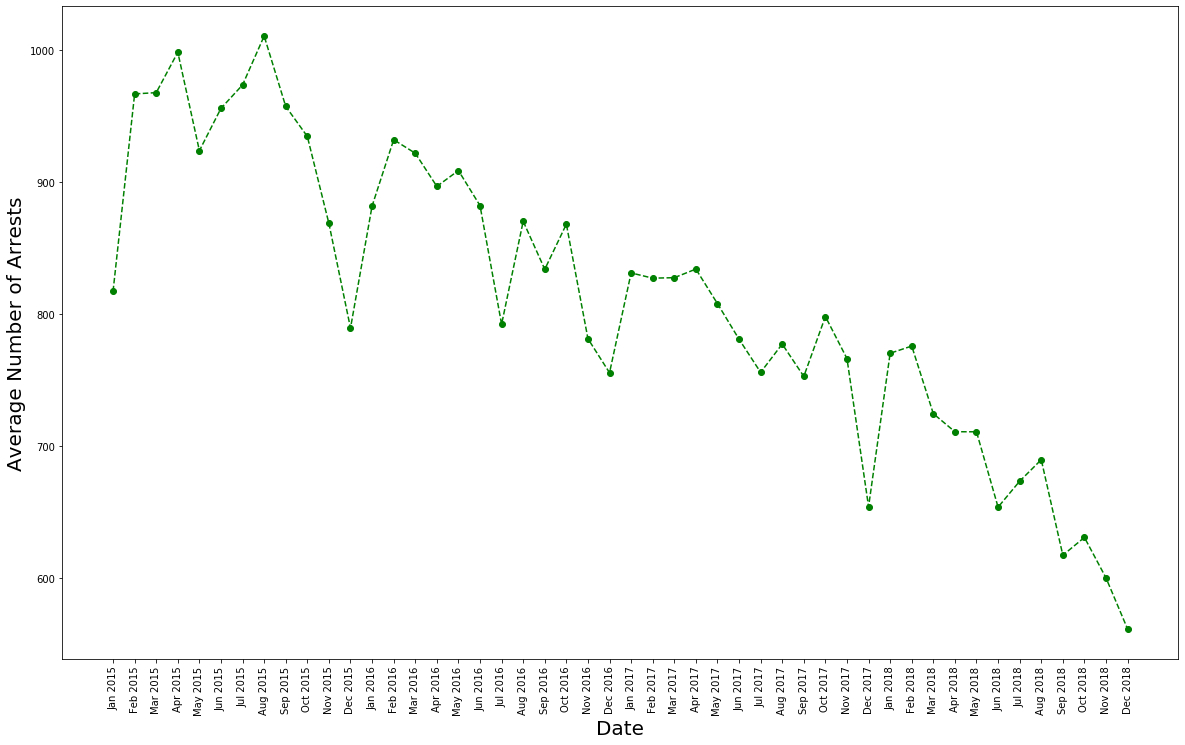

In [249]:
#making a plot of the average number of arrests each month
%matplotlib inline
import matplotlib.dates as mdates

fig = plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)
plt.plot(res_xaxis,results_month,'--o',color='g')
plt.xticks(rotation=90)

plt.ylabel('Average Number of Arrests',fontsize=20)
plt.xlabel('Date',fontsize=20)

plt.show()

In [250]:
#grouping just by date
results_day=results_df.groupby('arrest_date')
results_day_keys = list(results_day.keys())
results_day.arrest_key.count()

arrest_date
2015-01-01    412
2015-01-02    469
2015-01-03    365
2015-01-04    235
2015-01-05    412
             ... 
2018-12-27    640
2018-12-28    525
2018-12-29    531
2018-12-30    421
2018-12-31    302
Name: arrest_key, Length: 1461, dtype: int64

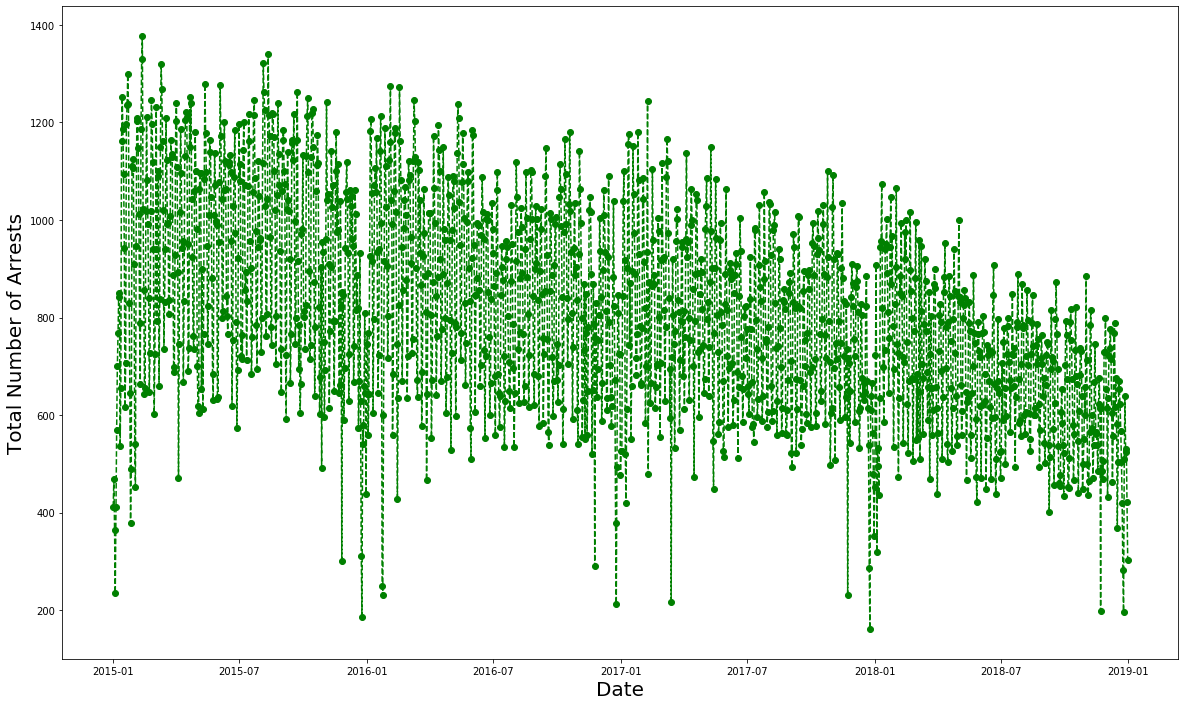

In [251]:
#here graphing instead the total number of arrests each day but I decided this was too dense to interpret easily
%matplotlib inline
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator() #every dat
years_fmt = mdates.DateFormatter('%Y-%m')

fig = plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)
plt.plot(results_day_keys,results_day.arrest_key.count(),'--o',color='g')

# format the ticks
#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(years_fmt)
#ax.xaxis.set_minor_locator(months)

plt.ylabel('Total Number of Arrests',fontsize=20)
plt.xlabel('Date',fontsize=20)

plt.show()

In [359]:
#decide I want some way to measure the variation in the number of arrests each day that I don't get
#just by looking at the total number each month/number of days per month

#so I decide I am going to group by day and then average that value over the month
results_day_all = results_df.groupby(['year','month','arrest_date'],as_index=False).arrest_key.count().rename(columns={'arrest_key':'num_arrests'})
#results_average=results_day_all.groupby(['year','month']).agg(['mean','std'])

#here I take the total number of arrests each day and look at the average and standard deviation of this value each month
results_average=results_day_all.groupby(['year','month'],as_index=False).agg(['mean','std']).rename(columns={'mean':'mean_arrests','std':'std_arrests'})
results_average_keys = list(results_average['num_arrests']['mean_arrests'].keys())

#again I make an x-axis for my plot by combining the date index and converting the month to a string of the month
res_avg_xaxis = [calendar.month_abbr[m]+" "+str(n) for m,n in zip(list(map(itemgetter(1), results_average_keys)), list(map(itemgetter(0), results_average_keys)))]

res_avg_xaxis_num = [i for i in range(len(res_avg_xaxis))]

In [360]:
#I am going to fit a line to this trend so I need to import a fitting package
from scipy.optimize import curve_fit

In [361]:
#this is my model of the trend. I'm sticking with a line for simplicity
def func(x, m, b):
    return m * x + b

In [491]:
#using scipy's cuve fit to fit a line to the average number of arrests/day each month using the standard deviation 
#in this quantity as the error
popt, pcov = curve_fit(func, res_avg_xaxis_num, results_average['num_arrests']['mean_arrests'],sigma=results_average['num_arrests']['std_arrests'])
popt

array([ -7.81432136, 999.69722807])

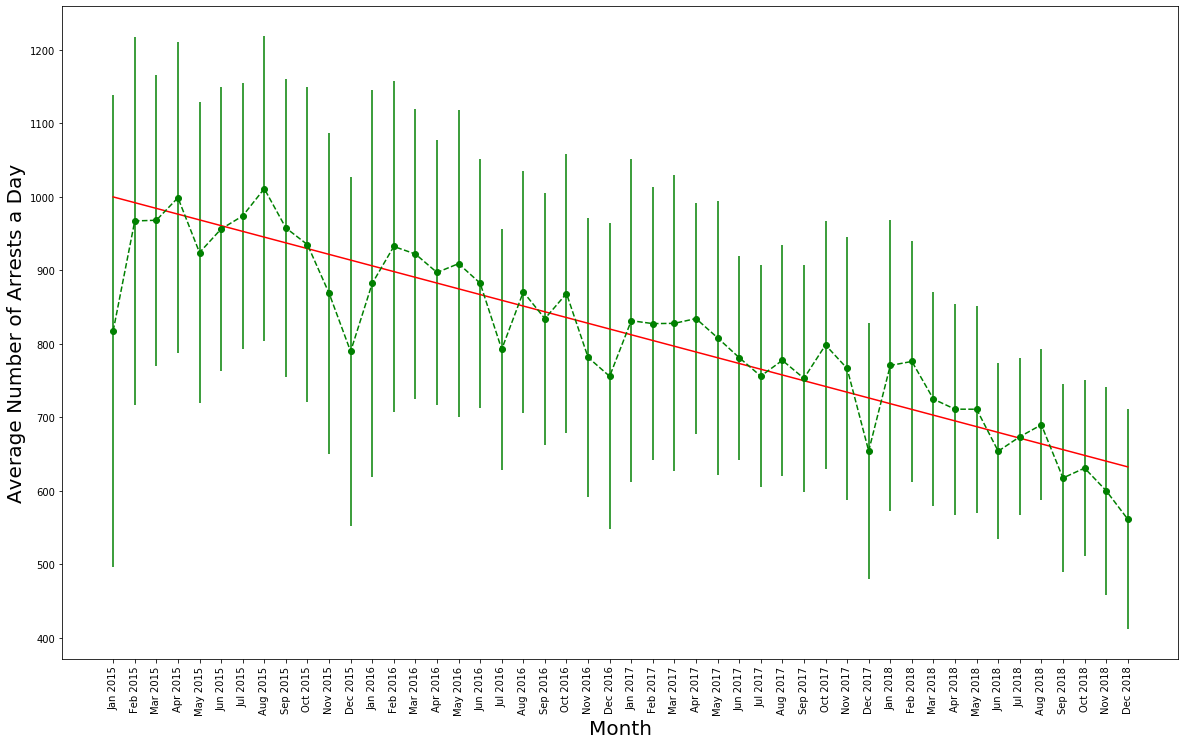

In [386]:
#plotting the data as well as the model I fit
#the trend looks sensible and shows that the average number of arrests/day is decreasing by about ~8 month over month
fig = plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)

plt.errorbar(res_avg_xaxis_num,results_average['num_arrests']['mean_arrests'],yerr=results_average['num_arrests']['std_arrests'],fmt='--o',color='g')

plt.plot(res_avg_xaxis_num, func(np.asarray(res_avg_xaxis_num), *popt), 'r-')

plt.xticks(np.arange(min(res_avg_xaxis_num), max(res_avg_xaxis_num)+1, 1.0))
ax.set_xticklabels(res_avg_xaxis)

plt.xticks(rotation=90)
plt.ylabel('Average Number of Arrests a Day',fontsize=20)
plt.xlabel('Month',fontsize=20)

plt.show()

In [534]:
#sorting by year and arrest description to get the top five arrest descriptions in 2018
results_pd_desc = results_df.groupby(['year','pd_desc']).arrest_key.count().rename(columns={'arrest_key':'num_arrests'})
results_top5 = list(results_pd_desc.loc[2018].sort_values(ascending=False).head(5).index)
#results_top5
years=np.unique(list(results_pd_desc.index.get_level_values(0)))

In [537]:
#actually easiest to re-group by description and then year to plot the trends in the top 5 2018 arrest categories/year
results_pd_desc = results_df.groupby(['pd_desc','year']).arrest_key.count().rename(columns={'arrest_key':'num_arrests'})
results_pd_desc.loc[results_top5[1]]

year
2015    25772
2016    23871
2017    23020
2018    23405
dtype: int64

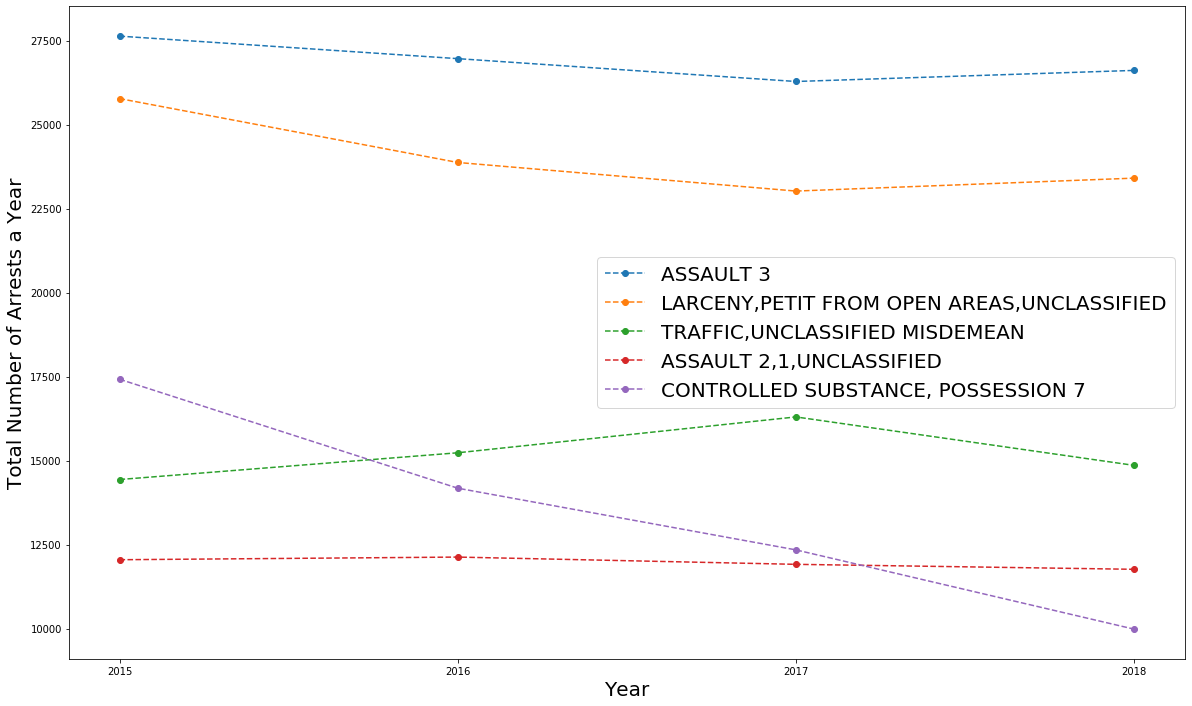

In [543]:
#looping over each of the top 5 arrest categories in 2018 to show how the number of arrests of each description has
#evolved since 2015
fig = plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)
for i, pd in enumerate(results_top5):
    plt.plot(years,results_pd_desc.loc[results_top5[i]],'--o',label=pd)
    plt.xticks(np.arange(min(years), max(years)+1, 1.0))
    
plt.ylabel('Total Number of Arrests a Year',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [484]:
#now grouping by arrest precinct to look at the trend across precinct 19 and 73
#because there are only about 4-5 arrests on any given day in particular precincts, I am
#adding up the total number of arrests per month and looking at the average and standard deviation of that value each year
results_precinct = results_df.groupby(['year','month','arrest_precinct'],as_index=False).arrest_key.count().rename(columns={'arrest_key':'num_arrests'})
results_precinct_avg=results_precinct.groupby(['arrest_precinct','year']).num_arrests.agg(['mean','std'])
years = list(results_precinct_avg.loc[19,].index )
results_precinct_avg.loc[([19,73],)]['mean']

arrest_precinct  year
19               2015    235.833333
                 2016    242.083333
                 2017    238.333333
                 2018    196.000000
73               2015    746.666667
                 2016    654.833333
                 2017    517.000000
                 2018    456.833333
Name: mean, dtype: float64

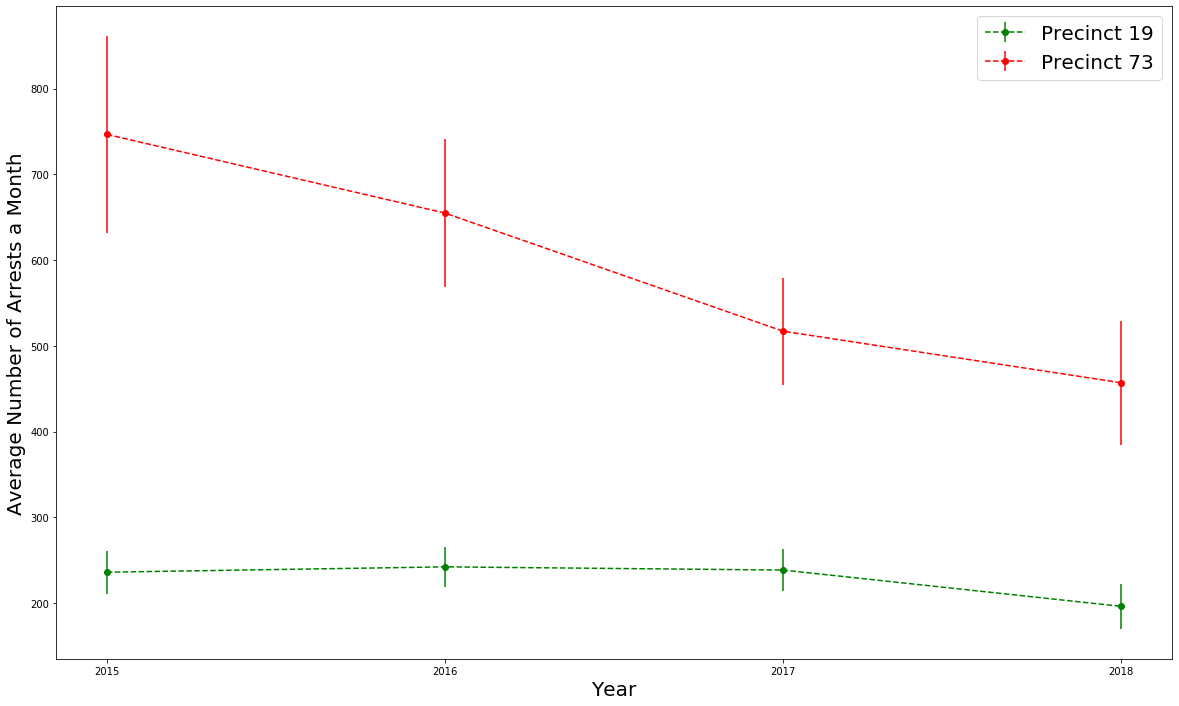

In [501]:
#plotting this result
fig = plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)

plt.errorbar(years,results_precinct_avg.loc[19,]['mean'],yerr=results_precinct_avg.loc[19,]['std'],fmt='--o',color='g',label='Precinct 19')
plt.errorbar(years,results_precinct_avg.loc[73,]['mean'],yerr=results_precinct_avg.loc[73,]['std'],fmt='--o',color='r',label='Precinct 73')

plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.ylabel('Average Number of Arrests a Month',fontsize=20)
plt.xlabel('Year',fontsize=20)

plt.legend(fontsize=20)
plt.show()

In [492]:
#I want to see if the difference in these means is statistically significant so I'm going to use a T-test
from scipy import stats

In [499]:
#Here the p-value tells me what the chance of getting two measured means this far apart is if the actual means are the same
#This number is quite small which means I can reject the null hypothesis (the hypothesis that these values are the same)
statistic, pvalue = stats.ttest_ind(results_precinct[(results_precinct.year==2015) & (results_precinct.arrest_precinct==19)].num_arrests, results_precinct[(results_precinct.year==2015) & (results_precinct.arrest_precinct==73)].num_arrests, equal_var=False)
statistic, pvalue

(-15.087908090838447, 3.510760680272363e-09)

In [500]:
#I wanted to check for both 2015 and 2018 to see if anything has changed. While the means are closer in 2018 than 2015,
#they are still not similar enough to allow us to keep the null hypthesis
statistic, pvalue = stats.ttest_ind(results_precinct[(results_precinct.year==2018) & (results_precinct.arrest_precinct==19)].num_arrests, results_precinct[(results_precinct.year==2018) & (results_precinct.arrest_precinct==73)].num_arrests, equal_var=False)
statistic, pvalue

(-11.710897902384046, 1.3663556281142544e-08)